# AV7

Considere a função: f(x)=(k*x^2)/2 onde k é a constante elástica de uma mola. Essa função representa a energia potencial elástica acumulada em uma mola quando comprimida ou esticada por uma distância x a partir da posição de equilíbrio. Assuma que k=200N/m (valor típico para uma mola rígida).
 

## a) Visualização e análise analítica


- Plote o gráfico da função f(x) no intervalo de x=0 a x=0,2 metros.

- Obtenha, se possível, a função primitiva (isto é, a integral indefinida de f(x)).

- Plote também a função primitiva no mesmo intervalo.

- Usando a função primitiva, calcule o valor da integral definida entre 0 e 0,2 m.

- Comente:
  - O valor obtido representa energia? Trabalho? Interprete fisicamente o resultado.
  - O gráfico da função primitiva faz sentido no contexto físico?

Primitiva simbólica: F(x) = 33.3333333333333*x**3


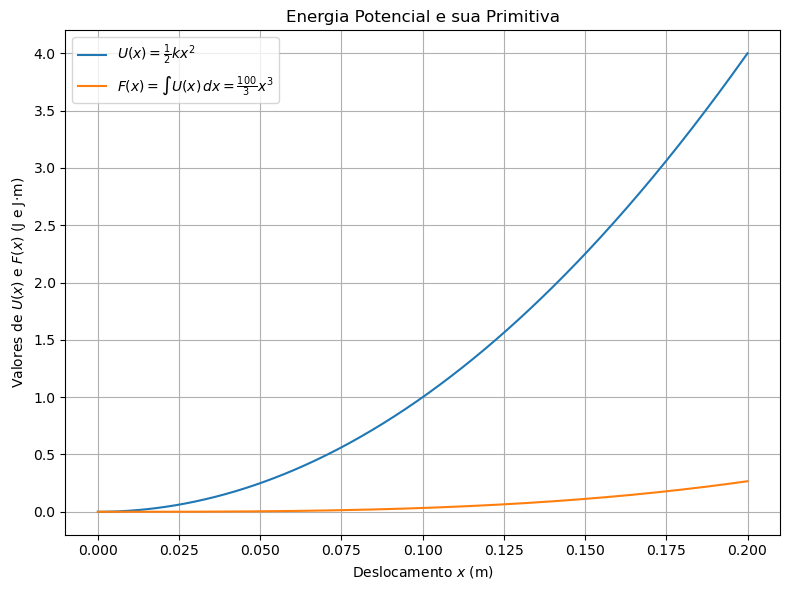

Integral definida ∫₀^0.2 U(x) dx = 0.266667 J·m


In [8]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

# 1. Parâmetros
k = 200.0  # constante elástica (N/m)

# 2. Definição numérica de x e f(x)
x_vals = np.linspace(0, 0.2, 400)         # de 0 a 0.2 m
f_vals = (k * x_vals**2) / 2              # U(x) = 1/2 k x^2, em joules

# 3. Cálculo simbólico da primitiva F(x)
x = sp.symbols('x')
f_sym = k * x**2 / 2
F_sym = sp.integrate(f_sym, x)
F_sym = sp.simplify(F_sym)
print("Primitiva simbólica: F(x) =", F_sym)  

# 4. Função Python a partir da expressão simbólica
F = sp.lambdify(x, F_sym, 'numpy')

# 5. Plots
plt.figure(figsize=(8,6))
plt.plot(x_vals, f_vals,
         label=r'$U(x)=\frac{1}{2}kx^2$')        
plt.plot(x_vals, F(x_vals),
         label=r'$F(x)=\int U(x)\,dx=\frac{100}{3}x^3$')
plt.xlabel('Deslocamento $x$ (m)')
plt.ylabel('Valores de $U(x)$ e $F(x)$ (J e J·m)')
plt.title('Energia Potencial e sua Primitiva')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 6. Cálculo da integral definida de 0 a 0.2 m
I = F(0.2) - F(0)
print(f"Integral definida ∫₀^{0.2} U(x) dx = {I:.6f} J·m")


## Resposta

- **Primitiva simbólica**  
  $$
    F(x) = \int \frac{1}{2}\,k\,x^2 \,dx
         = \frac{k}{6}\,x^3
         = \frac{100}{3}\,x^3
  $$

- **Integral definida**  
  $$
    \int_{0}^{0.2} \frac{1}{2}\cdot200\,x^2\,dx
    = \left[\frac{100}{3}x^3\right]_{0}^{0.2}
    = 0{,}2666667\;\mathrm{J\cdot m}
  $$

- **Interpretação física**  
  - O valor da integral corresponde à **área sob a curva** de energia potencial versus deslocamento, tendo unidades de J·m (energia × deslocamento).  
  - Não representa diretamente energia (J) nem trabalho (J); é uma quantificação matemática da área sob $U(x)$.

- **Gráfico da primitiva**  
  - A curva cúbica $F(x)\propto x^3 $ cresce mais rapidamente que $U(x)$.  
  - Faz sentido como antiderivada de $U(x)$, mas não possui interpretação física direta em termos de energia ou trabalho em mecânica de molas.


----
## b) Integração pela regra do trapézio

- Calcule numericamente a integral definida de f(x) entre 0 e 0,2 usando a regra do trapézio com n=10 subintervalos.

- Calcule o erro absoluto em relação ao valor exato obtido no item anterior.

- Comente sobre o comportamento do método.

Regra do trapézio (n=10): 0.268000 J·m
Valor exato:             0.266667 J·m
Erro absoluto:           0.001333 J·m


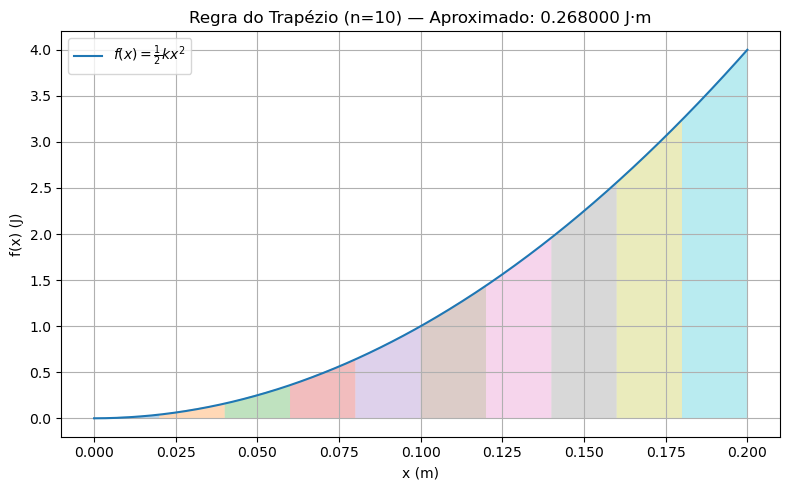

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros e função
k = 200.0  # constante elástica (N/m)
def f(x):
    return 0.5 * k * x**2

# Intervalo e subdivisões
a, b = 0.0, 0.2
n = 10
h = (b - a) / n

# Pontos para a regra do trapézio
x_nodes = np.linspace(a, b, n + 1)
y_nodes = f(x_nodes)

# Cálculo pela regra do trapézio
I_trap = (h / 2) * (y_nodes[0] + 2 * np.sum(y_nodes[1:-1]) + y_nodes[-1])

# Valor exato da integral
I_exact = (k / 6) * b**3

# Erro absoluto
erro = abs(I_trap - I_exact)

# Impressão dos resultados
print(f"Regra do trapézio (n={n}): {I_trap:.6f} J·m")
print(f"Valor exato:             {I_exact:.6f} J·m")
print(f"Erro absoluto:           {erro:.6f} J·m")

# Plot da função e dos trapézios
x_plot = np.linspace(a, b, 400)
plt.figure(figsize=(8, 5))

# Curva exata        
plt.plot(x_plot, f(x_plot), label=r'$f(x)=\frac{1}{2}kx^2$')

# Desenho dos trapézios
for i in range(n):
    xs = [x_nodes[i], x_nodes[i], x_nodes[i+1], x_nodes[i+1]]
    ys = [0, y_nodes[i], y_nodes[i+1], 0]
    plt.fill(xs, ys, alpha=0.3)

plt.xlabel('x (m)')
plt.ylabel('f(x) (J)')
plt.title(f'Regra do Trapézio (n={n}) — Aproximado: {I_trap:.6f} J·m')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Resposta:

- **Tendência de superestimação**  
  Como $f(x)=\tfrac12kx^2$ é uma função convexa (côncava para cima), cada trapézio forma um “telhado” acima da curva verdadeira, fazendo com que a soma das áreas dos trapézios seja ligeiramente **maior** do que a área exata.

- **Erro relativamente pequeno**  
  Com apenas $n=10$ subintervalos, o erro absoluto ficou em cerca de $0{,}00133$ J·m, ou seja, um erro relativo de aproximadamente **0,5 %** — já um resultado bastante satisfatório para muitas aplicações práticas.

- **Ordem de convergência $O(h^2)$**  
  O método do trapézio tem erro que escala como $h^2$, onde $h=(b-a)/n$. Assim, ao dobrar o número de subintervalos ($n\to2n$), o erro tende a diminuir em cerca de um fator de quatro.

- **Suavidade da função favorece o método**  
  Para funções polinomiais suaves (como a quadrática que temos aqui), mesmo valores modestos de $n$ fornecem aproximações muito boas. Em contraste, funções com descontinuidades ou oscilações exigiriam $n$ bem maior para alcançar precisão similar.

- **Trade-off custo vs. precisão**  
  Aumentar $n$ reduz o erro, mas consome mais avaliações de $f(x)$ e, portanto, mais tempo de processamento. Em aplicações em que cada avaliação é cara, vale avaliar se o ganho de precisão justifica o custo computacional adicional.


----

## c) Integração pela regra de Simpson

- Calcule a mesma integral usando a regra de Simpson com n=10 subintervalos.

- Compare o resultado com o valor exato e com o obtido pela regra do trapézio.

- Qual método se mostrou mais preciso neste caso?

Simpson (n=10): 0.266667 J·m (exato: 0.266667 J·m)


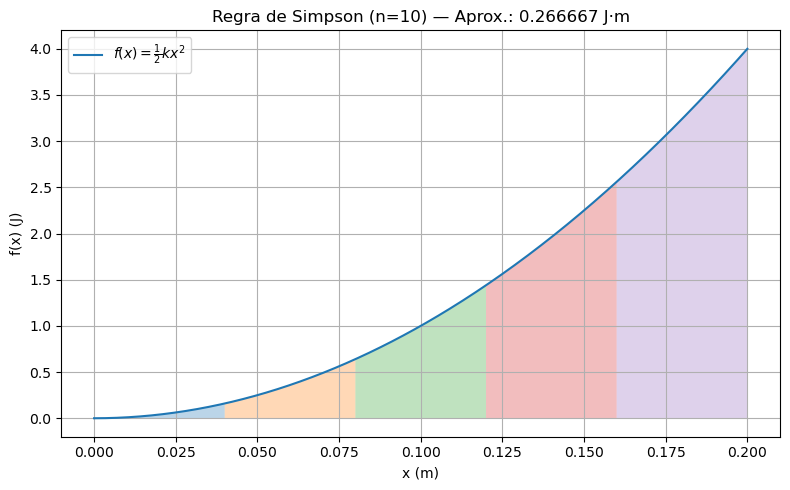

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# Parâmetros e função
k = 200.0  # constante elástica (N/m)
def f(x):
    return 0.5 * k * x**2

# Intervalo e subdivisões
a, b = 0.0, 0.2
n = 10
h = (b - a) / n

# Nós e valores
x_nodes = np.linspace(a, b, n + 1)
y_nodes = f(x_nodes)

# Regra de Simpson
I_simp = (h / 3) * (
    y_nodes[0]
    + 4 * np.sum(y_nodes[1:-1:2])
    + 2 * np.sum(y_nodes[2:-1:2])
    + y_nodes[-1]
)

# Valor exato para comparação
I_exact = (k / 6) * b**3

# Impressão de resultado
print(f"Simpson (n={n}): {I_simp:.6f} J·m (exato: {I_exact:.6f} J·m)")

# Plot da função e das áreas de Simpson
x_plot = np.linspace(a, b, 400)
plt.figure(figsize=(8, 5))
plt.plot(x_plot, f(x_plot), label=r'$f(x)=\frac{1}{2}kx^2$')

# Preenchimento das áreas de cada parábola
for i in range(0, n, 2):
    xi, xi1, xi2 = x_nodes[i], x_nodes[i+1], x_nodes[i+2]
    xs = np.linspace(xi, xi2, 100)
    ys = f(xs)
    plt.fill_between(xs, ys, alpha=0.3)

plt.xlabel('x (m)')
plt.ylabel('f(x) (J)')
plt.title(f'Regra de Simpson (n={n}) — Aprox.: {I_simp:.6f} J·m')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()